Let’s start with importing all the libraries first:

In [1]:
# importing the libraries

import numpy as np
import pandas as pd
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

We will perform some transformations on the images, like normalizing the pixel values, so, let’s define those transformations as well


In [2]:
# transformations to be applied on images

transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

Now, let’s load the training and testing set of the MNIST dataset


In [3]:
trainset = datasets.MNIST('./data', download=True, train=True, transform=transform)
testset = datasets.MNIST('./', download=True, train=False, transform=transform)

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


/opt/conda/conda-bld/pytorch_1591914880026/work/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw






Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw
Processing...
Done!


Next, I have defined the train and test loader which will help us to load the training and test set in batches. I will define the batch size as 64

In [4]:
# defining trainloader and testloader
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Let’s look at the summary of the training set first:

In [5]:
# shape of training data
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


So, in each batch, we have 64 images, each of size 28,28 and for each image, we have a corresponding label. Let’s visualize a training image and see how it looks

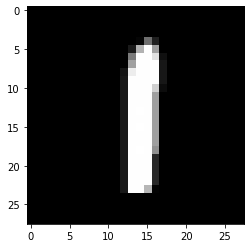

In [6]:
# visualizing the training images
plt.imshow(images[0].numpy().squeeze(), cmap='gray')

It’s an image of number 8. Similarly, let’s visualize the test set image

In [7]:
# shape of validation data
dataiter = iter(testloader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


In the test set also, we have batches of size 64. Let’s now define the architecture

In [8]:
# defining the model architecture
class Net(nn.Module):   
  def __init__(self):
      super(Net, self).__init__()

      self.cnn_layers = nn.Sequential(
          # Defining a 2D convolution layer
          nn.Conv2d(1, 4, kernel_size=3, stride=1, padding=1),
          nn.BatchNorm2d(4),
          nn.ReLU(inplace=True),
          nn.MaxPool2d(kernel_size=2, stride=2),
          # Defining another 2D convolution layer
          nn.Conv2d(4, 4, kernel_size=3, stride=1, padding=1),
          nn.BatchNorm2d(4),
          nn.ReLU(inplace=True),
          nn.MaxPool2d(kernel_size=2, stride=2),
      )

      self.linear_layers = nn.Sequential(
          nn.Linear(4 * 7 * 7, 10)
      )

  # Defining the forward pass    
  def forward(self, x):
      x = self.cnn_layers(x)
      x = x.view(x.size(0), -1)
      x = self.linear_layers(x)
      return x

Let’s also define the optimizer and loss function then we will look at the summary of this model

In [9]:
# defining the model
model = Net()
# defining the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.01)
# defining the loss function
criterion = nn.CrossEntropyLoss()
# checking if GPU is available
if torch.cuda.is_available():
    model = model.cuda()
    criterion = criterion.cuda()
    
print(model)

Net(
  (cnn_layers): Sequential(
    (0): Conv2d(1, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(4, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (linear_layers): Sequential(
    (0): Linear(in_features=196, out_features=10, bias=True)
  )
)


Now our model architecture is ready, let’s train this model for 10 epochs

In [10]:
for i in range(10):
    running_loss = 0
    for images, labels in trainloader:

        if torch.cuda.is_available():
          images = images.cuda()
          labels = labels.cuda()

        # Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(i+1, running_loss/len(trainloader)))

Epoch 1 - Training loss: 0.18498120927162517
Epoch 2 - Training loss: 0.09083321380383297
Epoch 3 - Training loss: 0.08189530037383218
Epoch 4 - Training loss: 0.07542595624832361
Epoch 5 - Training loss: 0.07169675431065341
Epoch 6 - Training loss: 0.06836385150025012
Epoch 7 - Training loss: 0.06608668564340231
Epoch 8 - Training loss: 0.0635401263072499
Epoch 9 - Training loss: 0.06184220796615791
Epoch 10 - Training loss: 0.06065309989843955


You can see that the training is decreasing with an increasing number of epochs. This means that our model is learning patterns from the training set. Let’s check the performance of this model on the test set:

In [11]:

# getting predictions on test set and measuring the performance
correct_count, all_count = 0, 0
for images,labels in testloader:
  for i in range(len(labels)):
    if torch.cuda.is_available():
        images = images.cuda()
        labels = labels.cuda()
    img = images[i].view(1, 1, 28, 28)
    with torch.no_grad():
        logps = model(img)

    
    ps = torch.exp(logps)
    probab = list(ps.cpu()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.cpu()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 10000

Model Accuracy = 0.9728


So, we tested a total of 10000 images and the model is around 90% accurate in predicting the labels for test images. This is how you can build a Convolutional Neural Network in PyTorch. In the next section, we will look at how to implement the same architecture in TensorFlow.

# Implementing a CNN in TensorFlow

In [12]:
# importing the libraries
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

Let’s now load the MNIST dataset using the datasets class of tensorflow.keras:

In [13]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data(path='mnist.npz')
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

11493376/11490434 [==============================] - 0s 0us/step


Here, we have loaded the training as well as the test set of the MNIST dataset. Also, we have normalized the pixel values for both training as well as test images. Next, let’s visualize a few images from the dataset

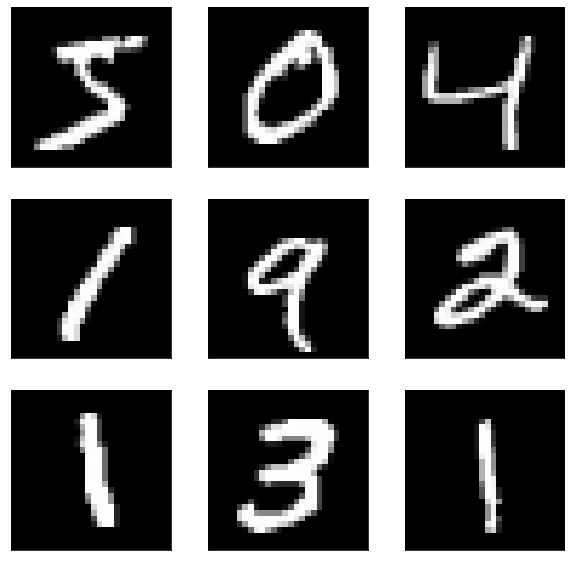

In [14]:
# visualizing a few images
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap='gray')
plt.show()

Subsequently, this is how our dataset looks like. We have images of handwritten digits. Let’s also look at the shapes of the training and test set

In [15]:
# shape of the training and test set
(train_images.shape, train_labels.shape), (test_images.shape, test_labels.shape)

(((60000, 28, 28), (60000,)), ((10000, 28, 28), (10000,)))

So, we have 60,000 images of shape 28 by 28 in the training set and 10,000 images of the same shape in the test set. Next, we will resize the shape of images and one-hot encode the target variable

In [16]:
# reshaping the images
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# one hot encoding the target variable
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

### Defining Model Architecture

In [17]:
# defining the model architecture
model = models.Sequential()
model.add(layers.Conv2D(4, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2), strides=2))
model.add(layers.Conv2D(4, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2), strides=2))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))

Let’s quickly look at the summary of the model

In [18]:
# summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 4)         40        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 4)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 4)         148       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 4)           0         
_________________________________________________________________
flatten (Flatten)            (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                1010      
Total params: 1,198
Trainable params: 1,198
Non-trainable params: 0
______________________________________________________

To summarize, we have 2 convolutional layers, 2 max-pooling layers, a flatten layer, and a dense layer. The total number of parameters in the model is 1,198. Now that our model is ready, we will compile it

In [19]:
# compiling the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

We are using Adam optimizer, and you can change it as well. The loss function is set to be as categorical cross-entropy since we are solving a multi-class classification problem and the metric is accuracy. Now let’s train our model for 10 epochs

In [20]:
# training the model
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4720 - accuracy: 0.8541 - val_loss: 0.2096 - val_accuracy: 0.9374
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2005 - accuracy: 0.9408 - val_loss: 0.1615 - val_accuracy: 0.9505
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1636 - accuracy: 0.9514 - val_loss: 0.1416 - val_accuracy: 0.9560
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1456 - accuracy: 0.9566 - val_loss: 0.1233 - val_accuracy: 0.9631
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1323 - accuracy: 0.9603 - val_loss: 0.1155 - val_accuracy: 0.9648
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1224 - accuracy: 0.9633 - val_loss: 0.1082 - val_accuracy: 0.9660
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1142 - accuracy: 0.9655 - val_loss: 0.1063 - val_accuracy:

the training loss was about 0.46 and after 10 epochs, the training loss reduced to 0.08. The training and validation accuracies after 10 epochs are 97.31% and 97.48% respectively


